

# <span style="color:#336699">Introduction to the SpatioTemporal Asset Catalog (STAC)</span>
<hr style="border:2px solid #0077b9;">

<br/>

<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the data.geo.admin.ch STAC service to discover and access the data products of  <em>SwissEO</em>.


<br/>



# Introduction
<hr style="border:1px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through the colaboration of several organizations intended to increase satellite image search interoperability.

The diagram depicted in the picture contains the most important concepts behind the STAC data model:

<center>
<img src="../../../img/stac/stac-concept.png" width="480" />
<br/>
<b>Figure 1</b> - STAC model.
</center>

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.

# STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [pystac-client](https://pystac-client.readthedocs.io/en/latest/). To install it from PyPI using `pip`, use the following command:

In [ ]:
!pip install pystac-client

In [ ]:
!pip install rasterio shapely matplotlib tqdm

In order to access the funcionalities of the client API, you should import the `stac` package, as follows:

In [1]:
import pystac_client

After that, you can check the installed `stac` package version:

In [2]:
pystac_client.__version__

'0.8.5'

Then, create a `STAC` object attached to the data.geo.admin.ch STAC service:

In [3]:
service = pystac_client.Client.open('https://data.geo.admin.ch/api/stac/v0.9/')

The "Swisstopo finish"  we need to add the conformance classes: 

In [4]:
service.add_conforms_to("COLLECTIONS")
service.add_conforms_to("ITEM_SEARCH")

# Listing the Available <em>SwissEO</em> Data Products
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the `STAC` object will list the available <em> SwissEO</em> collections from the service:

In [5]:
for collection in service.get_collections():
    if "swisseo" in collection.id.lower():
        print(collection)

<CollectionClient id=ch.swisstopo.swisseo_s2-sr_v100>
<CollectionClient id=ch.swisstopo.swisseo_vhi_v100>


<img src="../../../img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

# Retrieving the Metadata of a Collection
<hr style="border:1px solid #0077b9;">

The `collection` method returns information about a given collection identified by its name. In this example we are retrieving information about the datacube collection `ch.swisstopo.swisseo_s2-sr_v100`:

In [6]:
collection = service.get_collection('ch.swisstopo.swisseo_s2-sr_v100')
collection

<CollectionClient id=ch.swisstopo.swisseo_s2-sr_v100>

<img src="../../../img/stac/stac-item.png?raw=true" align="right" width="300"/>

# Retrieving Items
<hr style="border:1px solid #0077b9;">

The `get_items` method returns the items of a given collection:

In [7]:
#collection.get_items()
item_count = sum(1 for _ in collection.get_items())
print(f"Number of items in the collection: {item_count}")

Number of items in the collection: 899


In order to support filtering rules through the specification of a rectangle (`bbox`) or a date and time (`datatime`) criterias, use the `Client.search(**kwargs)`:

In [8]:
BBOX_AOI= (7.364515, 46.868545, 7.535312, 46.999127)
item_search = service.search(
    bbox=BBOX_AOI,
    datetime='2024-08-01/2024-08-31',
    collections=['ch.swisstopo.swisseo_s2-sr_v100']
)


The method `.search(**kwargs)` returns a `ItemSearch` representation which has handy methods to identify the matched results. For example, to check the number of items matched, use `.items()`:

In [9]:
items = list(item_search.items())
print(f"Found {len(items)} items")

Found 16 items


To iterate over the matched result, use `.items()` to traverse the list of items:

In [10]:
for item in item_search.items():
    print(item)

<Item id=2024-08-01t103031>
<Item id=2024-08-03t101559>
<Item id=2024-08-04t104021>
<Item id=2024-08-06t102559>
<Item id=2024-08-09t103629>
<Item id=2024-08-13t101559>
<Item id=2024-08-14t104021>
<Item id=2024-08-16t102559>
<Item id=2024-08-19t103629>
<Item id=2024-08-21t103021>
<Item id=2024-08-23t101559>
<Item id=2024-08-24t104021>
<Item id=2024-08-28t102021>
<Item id=2024-08-29t103629>
<Item id=2024-08-31t103021>
<Item id=2024-08-11t103031>


<img src="../../../img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Assets
<hr style="border:1px solid #0077b9;">

The assets with the links to the images, thumbnails or specific metadata files, can be accessed through the property `assets` (from a given item):

In [11]:
assets = item.assets

Then, from the assets it is possible to traverse or access individual elements:

In [12]:
for k in assets.keys():
    print(k)

ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_bands-10m.tif
thumbnail.jpg
ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_metadata.json
ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_bands-20m.tif
ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_cloudprobability-10m.tif
ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_masks-10m.tif
ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_registration-10m.tif


The metadata related to the Sentinel-2 10 bands is available under the dictionary key which do end with`bands-10m.tif`:

In [13]:
asset_key = next((key for key in assets.keys() if key.endswith('bands-10m.tif')), None)
band10m_asset = assets[asset_key ]
band10m_asset


<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_bands-10m.tif>

To iterate in the item's assets, use the following pattern:

In [14]:
for asset in assets.values():
    print(asset)

<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_bands-10m.tif>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/thumbnail.jpg>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_metadata.json>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_bands-20m.tif>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_cloudprobability-10m.tif>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t103031/ch.swisstopo.swisseo_s2-sr_v100_mosaic_2024-08-11t103031_masks-10m.tif>
<Asset href=https://data.geo.admin.ch/ch.swisstopo.swisseo_s2-sr_v100/2024-08-11t10303

# Using RasterIO and NumPy
<hr style="border:1px solid #0077b9;">

The `rasterio` library can be used to read image files from the data.geo.admin.ch service on-the-fly and then to create `NumPy` arrays. The `read` method of an `Item` can be used to perform the reading and array creation:

In [15]:

import rasterio


We will work with a subset and define the extent in 'BBOX_AOI_LV95', since <em> SwissEO</em> data is in 'EPSG:2056' aka 'LV95' projection

In [16]:
BBOX_AOI_LV95 = (2594452.12, 1195764.73, 2599109.31, 1199129.62)

The next cell code import the `Window` class from the `rasterio` library in order to retrieve the subset of the image and then create an array: We read from the `bands-10m.tif` which is assigned in the 'asset_key' and then the RED GREEN BLUE and NIR band

In [17]:

with rasterio.open(assets[asset_key].href) as src:
    window = src.window(*BBOX_AOI_LV95)   
    red = src.read(1, window=window)  
    green = src.read(2, window=window)  
    blue = src.read(3, window=window)  
    nir = src.read(4, window=window)  

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> If there are errors because of your pyproj version, you can run the code below as specified in <a  href="https://rasterio.readthedocs.io/en/latest/faq.html#why-can-t-rasterio-find-proj-db-rasterio-from-pypi-versions-1-2-0" target="_blank">rasterio documentation</a> and try again:

       import os
       del os.environ['PROJ_LIB']
</div>

In [ ]:
nir

# Using Matplotlib to Visualize Images
<hr style="border:1px solid #0077b9;">

The `Matplotlib` cab be used to plot the arrays read in the last section:

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

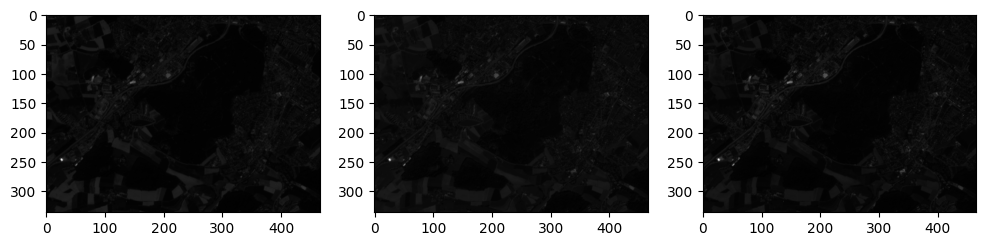

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

Using `Numpy` we can stack the previous arrays and use `Matplotlib` to plot a color image, but first we need to normalize their values:

In [20]:
import numpy

In [21]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

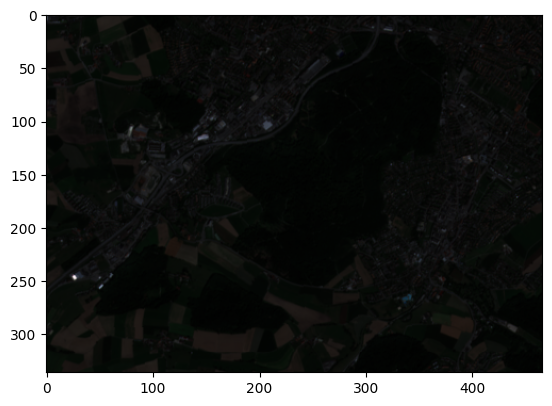

In [22]:
rgb = numpy.dstack((normalize(red), normalize(green), normalize(blue)))
plt.imshow(rgb)

# Retrieving Image Files
<hr style="border:1px solid #0077b9;">

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> Since <em>SwissEO</em> products are provided in cloud-native geospatial formats, such as <a href="https://cloudnativegeo.org" target="_blank">Cloudnative Geo Data</a>, including <a href="https://cogeo.org/" target="_blank">Cloud Optimized GeoTIFF</a> and <a href="https://geoparquet.org/" target="_blank">GeoParquet</a>, we strongly recommend leveraging these formats to stream data directly into your applications. This approach ensures that you are always working with the latest version of the data. Keep in mind: <a href="https://digital.ebp.ch/2014/03/31/services-or-raw-data/" target="_blank">everything is a cache unless you own the data.</a> Now, if you still really want to download the data: follow the instructions below...
</div>

The file related to an asset can be retrieved through the `download` method. The cell code below shows ho to download the image file associated to the asset into a folder named `img`:

In [46]:
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm

def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
    """Smart download STAC Item asset.

    This method uses a checksum validation and a progress bar to monitor download status.
    """
    if directory is None:
        directory = ''

    response = requests.get(asset.href, stream=True, **request_options)
    output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
    os.makedirs(directory, exist_ok=True)
    total_bytes = int(response.headers.get('content-length', 0))
    with tqdm.wrapattr(open(output_file, 'wb'), 'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

In [ ]:
download(assets[asset_key], 'img')

In order to download all files related to an item, iterate over assets and download each one as following:

In [ ]:
for asset in assets.values():
     download(asset, 'images')

# References
<hr style="border:1px solid #0077b9;">

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)


- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Image processing on images obtained through STAC](./stac-image-processing.ipynb)